In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import etfs as et

/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from etfs.security.io import read_yahoo_csv, retrieve_yahoo_quote, get_company_name
from etfs.stats.basics import resample_df, runrate_column, shift_column, returns_column, \
                              difference, rsq, beta, alpha, standard_deviation_column
from etfs.utils.helpers import todays_date
from etfs.visualization.trends import plot_trend, plot_candlestick, plot_ewm
from etfs.treasury.io import retrieve_treasury_yield_curve_rates

## Open connection to Robinhood account

In [4]:
import robin_stocks as r
from etfs.portfolio.io import import_portfolio_robinhood

In [5]:
# access password file
f = open("../../../.etfs.txt","r")
lines = f.readlines()
username = lines[0].strip().split('\n', 0)
password = lines[1].strip().split('\n', 0)
f.close()

# log in
access_token = r.login(username, password)

Please Type In The MFA Code: 347083


In [6]:
rh = import_portfolio_robinhood(access_token=access_token, 
                                username=username, 
                                password=password, 
                                name="Robinhood", 
                                free_stock=True)

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...
Parsing orders ...
Parsing bank transfers ...
Parsing dividends ...
Adding promotional stock ...
depositing 550.00 USD (new balance: 550.00 USD)
Checking ../data/MSFT.csv
Saving ../data/MSFT.csv
Checking ../data/MSFT.csv
Saving ../data/MSFT.csv
buying 1.00 MSFT (new balance: 455.88 USD)
buying 1.00 MSFT (new balance: 361.52 USD)
Checking ../data/AAPL.csv
Saving ../data/AAPL.csv
Checking ../data/AAPL.csv
Saving ../data/AAPL.csv
buying 1.00 AAPL (new balance: 193.84 USD)
Checking ../data/BABA.csv
Saving ../data/BABA.csv
Checking ../data/BABA.csv
Saving ../data/BABA.csv
buying 1.00 BABA (new balance: 0.50 USD)
Checking ../data/CHK.csv
Saving ../data/CHK.csv
Checking ../data/CHK.csv
Saving ../data/CHK.csv
buying 1.00 C

selling 1.00 JD (new balance: 102.85 USD)
Checking ../data/NTDOY.csv
Saving ../data/NTDOY.csv
Checking ../data/NTDOY.csv
Saving ../data/NTDOY.csv
buying 1.00 NTDOY (new balance: 67.93 USD)
buying 5.00 NIO (new balance: 35.29 USD)
Checking ../data/CVS.csv
Saving ../data/CVS.csv
Checking ../data/CVS.csv
Saving ../data/CVS.csv
buying 1.00 CVS (new balance: -30.73 USD)
selling 2.00 IQ (new balance: 5.55 USD)
buying 4.00 NIO (new balance: -20.71 USD)
buying 9.00 NTDOY (new balance: -333.42 USD)
selling 1.00 NFLX (new balance: 3.58 USD)
buying 2.00 ZTO (new balance: -30.88 USD)
selling 3.00 SONO (new balance: 2.90 USD)
depositing 1000.00 USD (new balance: 1002.89 USD)
buying 1.00 CVS (new balance: 939.36 USD)
buying 5.00 CVS (new balance: 621.51 USD)
buying 5.00 CVS (new balance: 301.46 USD)
buying 1.00 UNH (new balance: 50.60 USD)
buying 45.00 NIO (new balance: -253.07 USD)
selling 1.00 UNH (new balance: 6.60 USD)
selling 1.00 NTDOY (new balance: 44.88 USD)
selling 1.00 SQ (new balance: 116

selling 10.00 SONO (new balance: 88.90 USD)
Checking ../data/MOMO.csv
Saving ../data/MOMO.csv
Checking ../data/MOMO.csv
Saving ../data/MOMO.csv
buying 28.00 MOMO (new balance: -1044.00 USD)
selling 6.00 BABA (new balance: 30.90 USD)
buying 2.00 HUYA (new balance: -20.01 USD)
buying 2.00 HUYA (new balance: -70.75 USD)
selling 2.00 TCEHY (new balance: 25.41 USD)
dividend ZTO 7.59 USD (new balance: 32.98 USD)
buying 5.00 HUYA (new balance: -88.49 USD)
selling 1.00 OKTA (new balance: 3.61 USD)
buying 16.00 NIO (new balance: -76.38 USD)
buying 4.00 HUYA (new balance: -168.33 USD)
selling 7.00 SONO (new balance: -86.57 USD)
selling 1.00 FTNT (new balance: 3.03 USD)
buying 1.00 MOMO (new balance: -33.84 USD)
selling 3.00 ZTO (new balance: 23.55 USD)
buying 3.00 HUYA (new balance: -44.89 USD)
buying 21.00 NIO (new balance: -139.81 USD)
selling 2.00 CRSP (new balance: -61.33 USD)
selling 1.00 AYX (new balance: 23.44 USD)
buying 2.00 CRSP (new balance: -49.57 USD)
buying 3.00 HUYA (new balance: 

buying 1.00 TCEHY (new balance: 206.93 USD)
buying 1.00 JD (new balance: 179.86 USD)
buying 1.00 HUYA (new balance: 157.22 USD)
selling 1.00 SONO (new balance: 168.79 USD)
selling 1.00 SONO (new balance: 180.13 USD)
Checking ../data/JMIA.csv
Saving ../data/JMIA.csv
Checking ../data/JMIA.csv
Saving ../data/JMIA.csv
buying 1.00 JMIA (new balance: 156.72 USD)
buying 3.00 JMIA (new balance: 85.07 USD)
Checking ../data/ZM.csv
Saving ../data/ZM.csv
Checking ../data/ZM.csv
Saving ../data/ZM.csv
buying 11.00 ZM (new balance: -1009.22 USD)
buying 42.00 JMIA (new balance: -2052.92 USD)
selling 4.00 SNAP (new balance: -1995.96 USD)
selling 58.00 ZTO (new balance: -939.79 USD)
selling 39.00 JD (new balance: 131.55 USD)
buying 2.00 MOMO (new balance: 69.58 USD)
buying 3.00 IQ (new balance: 16.42 USD)
selling 2.00 SONO (new balance: 40.13 USD)
buying 6.00 FB (new balance: -1068.27 USD)
buying 6.00 FB (new balance: -2181.15 USD)
buying 11.00 FB (new balance: -4219.58 USD)
dividend TCEHY 2.47 USD (new

buying 1.00 EVER (new balance: -1.71 USD)
buying 1.00 SONO (new balance: -12.63 USD)
buying 16.00 SONO (new balance: -187.39 USD)
buying 10.00 SONO (new balance: -297.21 USD)
buying 1.00 SNAP (new balance: -311.64 USD)
buying 2.00 OSTK (new balance: -347.58 USD)
buying 31.00 SONO (new balance: -689.82 USD)
buying 4.00 SONO (new balance: -733.80 USD)
buying 13.00 SONO (new balance: -876.40 USD)
buying 73.00 EVER (new balance: -1922.50 USD)
buying 15.00 SONO (new balance: -2087.07 USD)
selling 1.00 FB (new balance: -1886.00 USD)
selling 1.00 JMIA (new balance: -1863.71 USD)
selling 1.00 TCEHY (new balance: -1817.64 USD)
selling 1.00 FTNT (new balance: -1729.19 USD)
selling 1.00 LYFT (new balance: -1662.56 USD)
selling 1.00 MOMO (new balance: -1627.28 USD)
selling 1.00 AYX (new balance: -1509.95 USD)
selling 1.00 WORK (new balance: -1477.59 USD)
selling 1.00 ZM (new balance: -1380.93 USD)
selling 1.00 MOMO (new balance: -1345.68 USD)
selling 1.00 GOOG (new balance: -196.15 USD)
selling 2.

buying 1.00 JPM (new balance: -473.56 USD)
selling 1.00 SONO (new balance: -463.22 USD)
selling 1.00 CRSP (new balance: -413.73 USD)
selling 1.00 LYFT (new balance: -350.95 USD)
selling 1.00 ZM (new balance: -255.86 USD)
selling 1.00 MOMO (new balance: -224.78 USD)
selling 1.00 SONO (new balance: -214.54 USD)
selling 2.00 JMIA (new balance: -187.92 USD)
selling 2.00 SONO (new balance: -167.52 USD)
selling 1.00 MELI (new balance: 503.17 USD)
selling 1.00 ZM (new balance: 597.34 USD)
buying 1.00 NIO (new balance: 594.19 USD)
buying 1.00 JD (new balance: 567.07 USD)
buying 1.00 NIO (new balance: 563.90 USD)
buying 7.00 NIO (new balance: 541.72 USD)
buying 3.00 JD (new balance: 460.30 USD)
buying 32.00 JD (new balance: -408.81 USD)
buying 30.00 NIO (new balance: -503.01 USD)
buying 31.00 NIO (new balance: -600.04 USD)
buying 52.00 NIO (new balance: -763.32 USD)
buying 186.00 NIO (new balance: -1348.81 USD)
buying 6.00 JMIA (new balance: -1424.11 USD)
selling 1.00 EVER (new balance: -1403.9

selling 11.00 CRWD (new balance: 974.97 USD)
selling 21.00 CRSP (new balance: 1927.50 USD)
buying 32.00 WORK (new balance: 1005.23 USD)
buying 11.00 ZM (new balance: 16.99 USD)
buying 74.00 SONO (new balance: -937.24 USD)
buying 44.00 EVER (new balance: -1894.54 USD)
selling 11.00 ZM (new balance: -902.78 USD)
selling 32.00 WORK (new balance: 21.99 USD)
buying 4.00 NIO (new balance: 10.36 USD)
buying 1.00 REAL (new balance: -3.28 USD)
buying 1.00 JMIA (new balance: -14.27 USD)
buying 1.00 IQ (new balance: -32.21 USD)
buying 1.00 EVER (new balance: -54.73 USD)
buying 1.00 CRWD (new balance: -139.26 USD)
buying 1.00 OKTA (new balance: -264.63 USD)
buying 10.00 NIO (new balance: -293.61 USD)
buying 2.00 WORK (new balance: -352.77 USD)
buying 4.00 REAL (new balance: -407.33 USD)
buying 5.00 CRSP (new balance: -642.96 USD)
buying 128.00 NIO (new balance: -1015.22 USD)
buying 7.00 RH (new balance: -1997.83 USD)
buying 7.00 TEAM (new balance: -2966.37 USD)
selling 1.00 GOOG (new balance: -177

## Get price history of a single stock

In [30]:
AAPL = et.Security('AAPL', start='2017-01-01')
SONO = et.Security('SONO', start='2017-01-01')

Checking ../data/AAPL.csv
Refresh failed
Checking ../data/SONO.csv
Refresh failed


In [6]:
AAPL.get_last_price()

204.16000366210938

In [8]:
r.get_latest_price(['AAPL'])

['201.800000']

## Exponential moving average price

In [16]:
from etfs.visualization.trends import plot_trend, plot_ewm

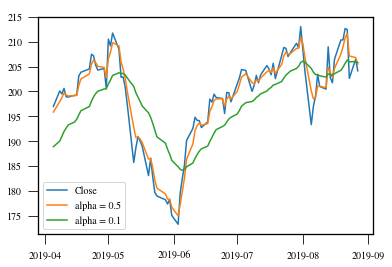

In [17]:
plot_ewm(security=AAPL, alphas=[.5, .1], ndays=100)

In [9]:
AAPL.last_price_ewm01 = AAPL.data["Close_ewm0.1_mean"].values[-1]
AAPL.last_price_ewm05 = AAPL.data["Close_ewm0.5_mean"].values[-1]
AAPL.last_price_ewm01, AAPL.last_price_ewm05

(205.82426809028794, 205.48521612267632)

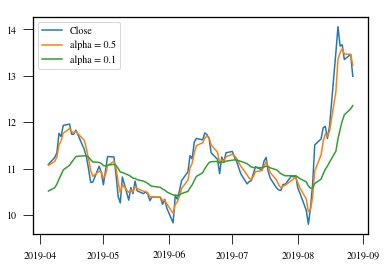

In [31]:
plot_ewm(security=SONO, alphas=[.5, .1], ndays=100)

## Exponential moving average standard deviation

In [47]:
AAPL.data["Deviation_ewm0.1"] = AAPL.data["Close"] - AAPL.last_price_ewm01
AAPL.data["Deviation_ewm0.5"] = AAPL.data["Close"] - AAPL.last_price_ewm05

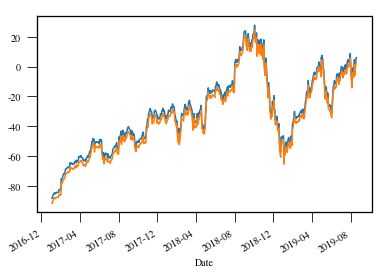

In [48]:
AAPL.data["Deviation_ewm0.1"].plot()
AAPL.data["Deviation_ewm0.5"].plot()

In [49]:
AAPL.data["Squared_Deviation_ewm0.1"] = np.square(AAPL.data["Deviation_ewm0.1"])
AAPL.data["Squared_Deviation_ewm0.5"] = np.square(AAPL.data["Deviation_ewm0.5"])

In [51]:
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Squared_Deviation_ewm0.1", alpha=0.1)
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Squared_Deviation_ewm0.5", alpha=0.5)

In [53]:
AAPL.data["Standard_deviation_ewm0.5"] = np.sqrt(AAPL.data["Squared_Deviation_ewm0.5_ewm0.5_mean"])
AAPL.data["Standard_deviation_ewm0.1"] = np.sqrt(AAPL.data["Squared_Deviation_ewm0.1_ewm0.1_mean"])

In [54]:
AAPL.last_standard_deviation_ewm01 = AAPL.data["Standard_deviation_ewm0.1"].values[-1]
AAPL.last_standard_deviation_ewm05 = AAPL.data["Standard_deviation_ewm0.5"].values[-1]
AAPL.last_standard_deviation_ewm01, AAPL.last_standard_deviation_ewm05

(4.829596840740295, 3.384130665251166)

AttributeError: 'Security' object has no attribute 'last_price_ewm'

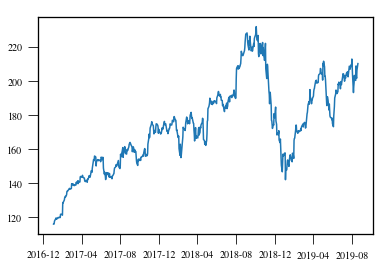

In [55]:
plt.plot(AAPL.data.Close)
plt.hlines(AAPL.last_price_ewm, xmin=min(AAPL.data.index), xmax=max(AAPL.data.index))
plt.hlines(AAPL.last_price_ewm01-2*AAPL.last_standard_deviation_ewm01, xmin=min(AAPL.data.index), xmax=max(AAPL.data.index), linestyle=':')
plt.xlim(AAPL.data.index[-20], AAPL.data.index[-1])

(180, 220)

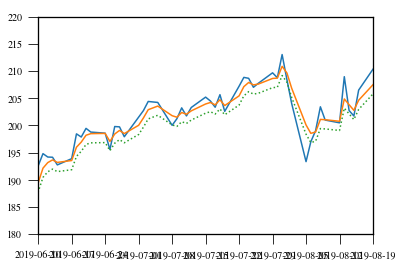

In [73]:
plt.plot(AAPL.data.Close)
plt.plot(AAPL.data["Close_ewm0.5_mean"])
plt.plot(AAPL.data["Close_ewm0.5_mean"]-0.5*AAPL.last_standard_deviation_ewm05, linestyle=':')
plt.xlim(AAPL.data.index[-50], AAPL.data.index[-1])
plt.ylim(180, 220)

(160, 220)

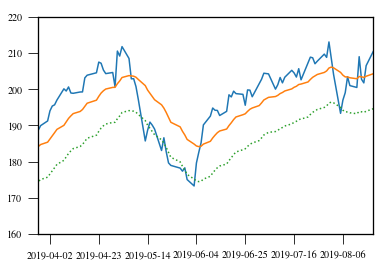

In [63]:
plt.plot(AAPL.data.Close)
plt.plot(AAPL.data["Close_ewm0.1_mean"])
plt.plot(AAPL.data["Close_ewm0.1_mean"]-2*AAPL.last_standard_deviation_ewm01, linestyle=':')
plt.xlim(AAPL.data.index[-100], AAPL.data.index[-1])
plt.ylim(160, 220)

## Pandas way of calculating the exponentially weighted standard deviation

In [18]:
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Close", alpha=0.1, func='std')
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Close", alpha=0.5, func='std')

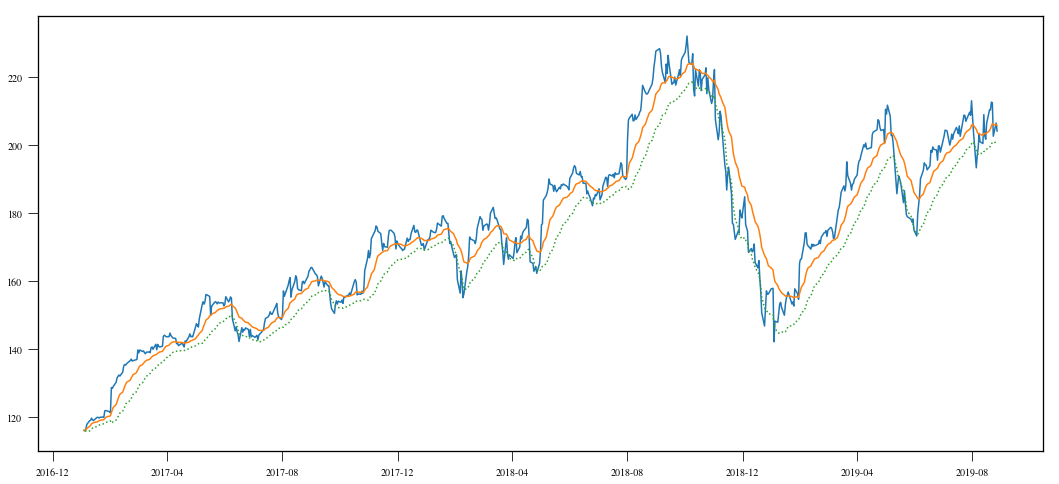

In [29]:
plt.figure(figsize=(18,8))
plt.plot(AAPL.data.Close)
plt.plot(AAPL.data["Close_ewm0.1_mean"])
plt.plot(AAPL.data["Close_ewm0.1_mean"]-1*AAPL.data["Close_ewm0.1_std"], linestyle=':')
#plt.xlim(AAPL.data.index[-100], AAPL.data.index[-1])
#plt.ylim(160, 220)


In [71]:
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Close", alpha=0.1, func='var')
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Close", alpha=0.5, func='var')

(160, 220)

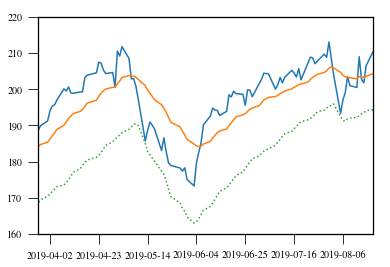

In [72]:
plt.plot(AAPL.data.Close)
plt.plot(AAPL.data["Close_ewm0.1_mean"])
plt.plot(AAPL.data["Close_ewm0.1_mean"]-2*np.sqrt(AAPL.data["Close_ewm0.1_var"]), linestyle=':')
plt.xlim(AAPL.data.index[-100], AAPL.data.index[-1])
plt.ylim(160, 220)

In [34]:
SONO.data, _ = et.stats.basics.ewm_column(SONO.data, column="Close", alpha=0.1, func='var')
SONO.data, _ = et.stats.basics.ewm_column(SONO.data, column="Close", alpha=0.5, func='var')

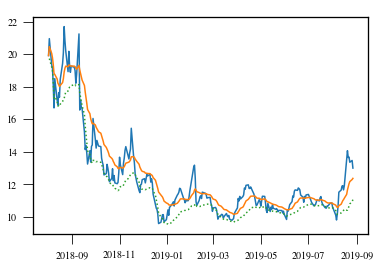

In [36]:
plt.plot(SONO.data.Close)
plt.plot(SONO.data["Close_ewm0.1_mean"])
plt.plot(SONO.data["Close_ewm0.1_mean"]-1*np.sqrt(SONO.data["Close_ewm0.1_var"]), linestyle=':')
#plt.xlim(AAPL.data.index[-100], AAPL.data.index[-1])
#plt.ylim(160, 220)

## Generate stop loss price for security

In [111]:
from etfs.stats.basics import ewm_column

In [225]:
def get_stop_loss_price(security=None, column="Close", alpha=.5, sigmas=2):
    """
    Return a price that can be used as stop loss signal
    """

    if security:
        # add a column with exponential moving average of price column
        _df, _column_ewm = ewm_column(security.data, column=column, alpha=alpha)
        _columns = _df.columns
        
        # get the latest exponentially weighted averaged price
        security.last_price_ewm = _df[_column_ewm].values[-1]
        _df["Deviation_ewm"] = _df[column] - security.last_price_ewm
        
        # calculate standard deviation
        _df["Squared_Deviation_ewm"] = np.square(_df["Deviation_ewm"])
        _df, _column_ewm2 = ewm_column(_df, column="Squared_Deviation_ewm", alpha=alpha)
        _df["Standard_deviation_ewm"] = np.sqrt(_df[_column_ewm2])

        # get the latest exponentially weighted average standard deviation
        security.last_standard_deviation_ewm = _df["Standard_deviation_ewm"].values[-1]
        
        price = security.last_price_ewm - sigmas*security.last_standard_deviation_ewm
    else:
        price = 0.0
    
    return price

In [151]:
AAPL.stop_loss_price = get_stop_loss_price(security=AAPL, column="Close", ndays=100, alpha=.5, sigmas=2)
AAPL.stop_loss_price

199.5043182456854

(737145.0, 737287.0)

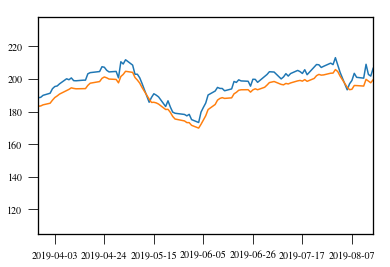

In [154]:
plt.plot(AAPL.data.Close)
plt.plot(AAPL.data["Close_ewm0.5"]-2*AAPL.last_standard_deviation_ewm)
plt.xlim(AAPL.data.index[-100], AAPL.data.index[-1])

In [123]:
AAPL.last_price_ewm, AAPL.last_standard_deviation_ewm

(204.6372047181924, 2.5664432362535057)

In [ ]:
r.orders.order_sell_stop_loss(symbol=AAPL.ticker, quantity, stopPrice, timeInForce='gtc')[source]

In [266]:
rh.positions()

Checking ../data/CVS.csv
Saving ../data/CVS.csv
Checking ../data/BND.csv
Saving ../data/BND.csv
Checking ../data/SFTBY.csv
Saving ../data/SFTBY.csv
Checking ../data/DB.csv
Saving ../data/DB.csv
Checking ../data/BIDU.csv
Saving ../data/BIDU.csv
Checking ../data/AMD.csv
Saving ../data/AMD.csv
Checking ../data/NVDA.csv
Saving ../data/NVDA.csv
Checking ../data/WDAY.csv
Saving ../data/WDAY.csv
Checking ../data/MSFT.csv
Saving ../data/MSFT.csv
Checking ../data/FB.csv
Saving ../data/FB.csv
Checking ../data/BABA.csv
Saving ../data/BABA.csv
Checking ../data/TSM.csv
Saving ../data/TSM.csv
Checking ../data/AAPL.csv
Saving ../data/AAPL.csv
Checking ../data/TSLA.csv
Saving ../data/TSLA.csv
Checking ../data/IQ.csv
Saving ../data/IQ.csv
Checking ../data/ZEN.csv
Saving ../data/ZEN.csv
Checking ../data/ZTO.csv
Saving ../data/ZTO.csv
Checking ../data/LYFT.csv
Saving ../data/LYFT.csv
Checking ../data/NFLX.csv
Saving ../data/NFLX.csv
Checking ../data/W.csv
Saving ../data/W.csv
Checking ../data/GOOG.csv
Sa

In [264]:
import time

In [265]:
r.cancel_all_open_orders()
positions_data = r.get_current_positions()
for ticker in rh.tickers:
    stock_data = [item for item in positions_data if
                  r.get_name_by_url(item['instrument']) == r.get_name_by_symbol(ticker)][0]
    if (rh.positions_df.Quantity[ticker] > 0) & (rh.positions_df.Quantity[ticker] == float(stock_data['quantity'])):
        _latest_price = float(r.get_latest_price([ticker])[0])
        _stop_loss_price = round(get_stop_loss_price(security=rh.securities[ticker], column="Close", ndays=100, alpha=.5, sigmas=2),2)
        _latest_price_ewm = rh.securities[ticker].last_price_ewm
        quantity = float(stock_data['quantity'])
        print(ticker, 
              quantity,
              _latest_price, 
              _latest_price_ewm, 
              _stop_loss_price, 
              _stop_loss_price - _latest_price,
              100*(_stop_loss_price - _latest_price)/_latest_price
             )
        r.order_sell_stop_loss(ticker,quantity,_stop_loss_price)
        time.sleep(5)
    else:
        print(rh.positions_df.Quantity[ticker], float(stock_data['quantity']))
        
    

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
All Orders Cancelled
TCEHY 21.0 41.885 41.97473762745699 40.98 -0.9050000000000011 -2.160678047033547
UNH 4.0 245.06 245.23440121282584 242.23 -2.8300000000000125 -1.154819227944182
CRSP 19.0 47.55 47.10575940846472 45.4 -2.1499999999999986 -4.521556256572027
HUYA 38.0 24.28 23.222691589427214 20.61 -3.6700000000000017 -15.115321252059314
OKTA 7.0 128.18 128.37257852275832 124.79 -3.3900000000000006 -2.644718364799501
FTNT 11.0 80.66 80.85959506870458 78.83 -1.8299999999999983 -2.2687825440119
MELI 1.0 624.53 623.3121159588849 599.11 -25.41999999999996 -4.070260836148777
MOMO 28.0 33.25 32.43416469530579 30.95 -2.3000000000000007 -6.917293233082709
SNAP 57.0 15.91 16.14313784352015 15.51 -0.40000000000000036 -2.514142049025772
JMIA 72.0 13.07 13.038116989746296 12.34 -0.7300000000000004 -5.585

In [255]:
round(_stop_loss_price,2)

40.98

In [235]:
r.order_sell_stop_loss(symbol='TCEHY', quantity=21, stopPrice=_stop_loss_price)

400 Client Error: Bad Request for url: https://api.robinhood.com/orders/


In [ ]:
symbol=ticker, 
                                      quantity=rh.positions_df.Quantity[ticker], 
                                      stopPrice=_stop_loss_price, 
                                      timeInForce='gtc'

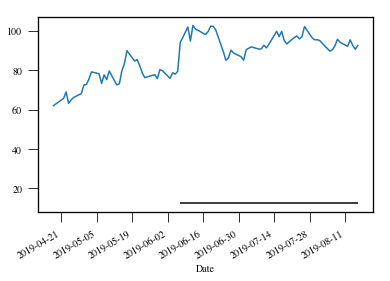

In [259]:
rh.securities['ZM'].data.Close.plot()
plt.hlines(12.341712985702028, xmin=rh.securities['JMIA'].data.index[-50], xmax=rh.securities['JMIA'].data.index[-1])

In [220]:
rh.tickers[0:1]

['TCEHY']

In [236]:
positions_data = r.get_current_positions()

In [237]:
positions_data

[{'shares_held_for_stock_grants': '0.0000',
  'account': 'https://api.robinhood.com/accounts/5UD70030/',
  'pending_average_buy_price': '108.9095',
  'shares_held_for_options_events': '0.0000',
  'intraday_average_buy_price': '0.0000',
  'url': 'https://api.robinhood.com/positions/5UD70030/f69573b8-d80a-4df9-9c36-4fdd2be5c70f/',
  'shares_held_for_options_collateral': '0.0000',
  'created_at': '2019-01-25T19:20:02.236469Z',
  'updated_at': '2019-08-18T03:54:11.147828Z',
  'shares_held_for_buys': '0.0000',
  'average_buy_price': '108.9095',
  'instrument': 'https://api.robinhood.com/instruments/f69573b8-d80a-4df9-9c36-4fdd2be5c70f/',
  'intraday_quantity': '0.0000',
  'shares_held_for_sells': '0.0000',
  'shares_pending_from_options_events': '0.0000',
  'quantity': '7.0000'},
 {'shares_held_for_stock_grants': '0.0000',
  'account': 'https://api.robinhood.com/accounts/5UD70030/',
  'pending_average_buy_price': '193.2185',
  'shares_held_for_options_events': '0.0000',
  'intraday_average_

In [260]:
stock_data = [item for item in positions_data if
              r.get_name_by_url(item['instrument']) == r.get_name_by_symbol('ZM')][0]

In [261]:
stock_data

{'shares_held_for_stock_grants': '0.0000',
 'account': 'https://api.robinhood.com/accounts/5UD70030/',
 'pending_average_buy_price': '95.6447',
 'shares_held_for_options_events': '0.0000',
 'intraday_average_buy_price': '0.0000',
 'url': 'https://api.robinhood.com/positions/5UD70030/35875944-ffb7-47eb-a2e5-582ba9f26a8d/',
 'shares_held_for_options_collateral': '0.0000',
 'created_at': '2019-06-13T14:39:20.362323Z',
 'updated_at': '2019-08-08T14:42:54.042560Z',
 'shares_held_for_buys': '0.0000',
 'average_buy_price': '95.6447',
 'instrument': 'https://api.robinhood.com/instruments/35875944-ffb7-47eb-a2e5-582ba9f26a8d/',
 'intraday_quantity': '0.0000',
 'shares_held_for_sells': '0.0000',
 'shares_pending_from_options_events': '0.0000',
 'quantity': '10.0000'}

In [262]:
sellQuantity = float(stock_data['quantity'])

In [263]:
sellQuantity

10.0

In [252]:
r.order_sell_stop_loss('ZM',sellQuantity,10.00)

{'updated_at': '2019-08-18T21:49:39.650718Z',
 'ref_id': None,
 'time_in_force': 'gtc',
 'last_trail_price': None,
 'fees': '0.00',
 'cancel': 'https://api.robinhood.com/orders/99adc496-c886-4448-9958-6afe28e20b34/cancel/',
 'response_category': None,
 'id': '99adc496-c886-4448-9958-6afe28e20b34',
 'cumulative_quantity': '0.00000',
 'stop_price': '10.00000000',
 'reject_reason': None,
 'instrument': 'https://api.robinhood.com/instruments/ffb40d09-3a49-4e9d-94f6-010c2778d473/',
 'state': 'unconfirmed',
 'trigger': 'stop',
 'override_dtbp_checks': False,
 'last_trail_price_updated_at': None,
 'type': 'market',
 'last_transaction_at': '2019-08-18T21:49:39.632808Z',
 'price': '10.00000000',
 'executions': [],
 'extended_hours': False,
 'account': 'https://api.robinhood.com/accounts/5UD70030/',
 'stop_triggered_at': None,
 'url': 'https://api.robinhood.com/orders/99adc496-c886-4448-9958-6afe28e20b34/',
 'created_at': '2019-08-18T21:49:39.632808Z',
 'side': 'sell',
 'override_day_trade_check

In [254]:
r.cancel_all_open_orders()

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
All Orders Cancelled


[]

## Rebalance

In [367]:
# access password file
f = open("../../../.etfs.txt","r")
lines = f.readlines()
username = lines[0].strip().split('\n', 0)
password = lines[1].strip().split('\n', 0)
f.close()

# log in
access_token = r.login(username, password)

Please Type In The MFA Code: 390324


In [7]:
allTransactions = r.get_bank_transfers()

deposits = sum(float(x['amount']) for x in allTransactions if (x['direction'] == 'deposit') and (x['state'] == 'completed'))
withdrawals = sum(float(x['amount']) for x in allTransactions if (x['direction'] == 'withdraw') and (x['state'] == 'completed'))
money_invested = deposits - withdrawals

In [8]:
profileData = r.load_portfolio_profile()

In [9]:
profileData

{'unwithdrawable_grants': '0.0000',
 'account': 'https://api.robinhood.com/accounts/5UD70030/',
 'excess_maintenance_with_uncleared_deposits': '14004.9465',
 'url': 'https://api.robinhood.com/portfolios/5UD70030/',
 'excess_maintenance': '14004.9465',
 'market_value': '24401.7400',
 'withdrawable_amount': '73.8500',
 'last_core_market_value': '24401.7400',
 'unwithdrawable_deposits': '0.0000',
 'extended_hours_equity': '24447.8713',
 'excess_margin': '10001.4702',
 'excess_margin_with_uncleared_deposits': '10001.4702',
 'equity': '24521.8000',
 'last_core_equity': '24521.8000',
 'adjusted_equity_previous_close': '24529.7700',
 'equity_previous_close': '24529.7700',
 'start_date': '2018-02-01',
 'extended_hours_market_value': '24327.8113'}

In [10]:
if profileData['extended_hours_equity']:
    current_balance = float(profileData['extended_hours_equity'])
else:
    current_balance = float(profileData['equity'])

In [11]:
current_balance, money_invested, 100*(current_balance/money_invested-1)

(24447.8713, 23560.0, 3.7685539049235883)

### Get cash balance

In [12]:
account_profile = r.load_account_profile()

In [13]:
balance = float(account_profile['cash'])+float(account_profile['unsettled_funds'])

In [14]:
def get_balance():
    account_profile = r.load_account_profile()
    return float(account_profile['cash'])+float(account_profile['unsettled_funds'])

In [15]:
#holdings = r.build_holdings()

In [16]:
positions_data = r.get_current_positions()

In [19]:
current_positions = len(positions_data)
positions = 24 #
mean_volume = current_balance/positions

In [20]:
print(current_positions, positions, mean_volume)

24 24 1018.6613041666666


In [38]:
# get stock data from Robinhood API

# build a dataframe
Ticker = []
Quantity = []
Price = []
Volume = []
Delta = []
NDelta = []

for stock_data in positions_data:
    ticker = r.get_instrument_by_url(stock_data['instrument'], info='symbol')
    quantity = float(stock_data['quantity'])
    price = float(r.get_latest_price([ticker])[0])
    volume = quantity*price
    delta = volume-mean_volume
    ndelta = delta/price
    print(ticker, 
          quantity, 
          price,
          quantity*price,
          delta,
          ndelta
         )
    Ticker.append(ticker)
    Quantity.append(quantity)
    Price.append(price)
    Volume.append(volume)
    Delta.append(delta)
    NDelta.append(ndelta)

AYX 7.0 142.35 996.4499999999999 -22.21130416666665 -0.1560330464816765
BYND 6.0 166.1 996.5999999999999 -22.061304166666673 -0.13281941099739117
CRSP 22.0 47.0 1034.0 15.338695833333418 0.3263552304964557
CRWD 12.0 80.95 971.4000000000001 -47.26130416666649 -0.5838332818612291
EVER 45.0 22.39 1007.5500000000001 -11.111304166666514 -0.4962619100788974
GS 5.0 202.0 1010.0 -8.661304166666582 -0.042877743399339516
GSK 24.0 41.9 1005.5999999999999 -13.061304166666673 -0.3117256364359588
IQ 55.0 18.02 991.1 -27.56130416666656 -1.5294841379948148
JMIA 92.0 10.87 1000.04 -18.62130416666662 -1.713091459674942
JPM 9.0 109.01 981.09 -37.57130416666655 -0.3446592438002619
LULU 5.0 184.67 923.3499999999999 -95.31130416666667 -0.516116879659212
MELI 2.0 594.6 1189.2 170.53869583333346 0.286812471969952
NIO 353.0 2.82 995.4599999999999 -23.20130416666666 -8.2274128250591
OKTA 8.0 125.0 1000.0 -18.661304166666582 -0.14929043333333267
REAL 76.0 13.0501 991.8076000000001 -26.85370416666649 -2.057739340

In [39]:
# build dataframe
d = {'Ticker': Ticker, 
 'Quantity': Quantity,
 'Price': Price,
 'Volume': Volume,
 'Delta': Delta,
 'NDelta': NDelta
}
df = pd.DataFrame(data=d)

In [40]:
df

,Ticker,Quantity,Price,Volume,Delta,NDelta
0,AYX,7.0,142.3500,996.4500,-22.211304,-0.156033
1,BYND,6.0,166.1000,996.6000,-22.061304,-0.132819
2,CRSP,22.0,47.0000,1034.0000,15.338696,0.326355
3,CRWD,12.0,80.9500,971.4000,-47.261304,-0.583833
4,EVER,45.0,22.3900,1007.5500,-11.111304,-0.496262
5,GS,5.0,202.0000,1010.0000,-8.661304,-0.042878
6,GSK,24.0,41.9000,1005.6000,-13.061304,-0.311726
7,IQ,55.0,18.0200,991.1000,-27.561304,-1.529484
8,JMIA,92.0,10.8700,1000.0400,-18.621304,-1.713091
9,JPM,9.0,109.0100,981.0900,-37.571304,-0.344659


In [41]:
open_orders = r.get_all_open_orders()

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...


In [42]:
# build a dataframe
Ticker = []
StopQuantity = []
StopPrice = []
StopOrderID = []

for order in open_orders:
    #print(order)
    ticker = r.get_instrument_by_url(order['instrument'], info='symbol')
    stopquantity = order['quantity']
    stopprice = order['stop_price']
    stoporderid = order['id']
    print(ticker,
          stopquantity, 
          stopprice, 
          stoporderid)
    Ticker.append(ticker)
    StopQuantity.append(stopquantity)
    StopPrice.append(stopprice)
    StopOrderID.append(stoporderid)

UNH 4.00000 211.52000000 d38c3c01-e5b6-4a6f-b62c-edda052141aa
TSLA 5.00000 205.68000000 5b62d304-0786-4cd3-b2e8-f46d82a66d68
SNAP 64.00000 14.88000000 c2b5c1c2-1370-432d-9555-a63c6a7e53be
SHOP 3.00000 366.80000000 1ca53daa-1908-4b00-a683-76b1cd054ce6
NIO 208.00000 2.78000000 9291a4d5-e4e0-4e14-88eb-9a7149715781
MELI 2.00000 573.45000000 722ba10c-287a-422c-a69b-607320da5324
LULU 5.00000 176.82000000 bf8860f0-6a2a-49d3-b6b8-e29f71da9fa3
JPM 9.00000 103.77000000 72a2d5d2-6d28-4dc4-a43b-f927cb1a1e78
GSK 24.00000 40.56000000 ca57c2ba-bb0f-468f-9354-f4b881f37b0b
GS 5.00000 194.03000000 7a61ebc8-63f5-4d10-9f96-2940a0bc119d
BYND 6.00000 143.66000000 0a65b5de-8743-40c4-9bd7-d3d87a84e4d2
AYX 7.00000 135.64000000 b8e632f9-bfb8-47df-bd6f-659b1a41d29e


In [43]:
# build dataframe
d = {'Ticker': Ticker, 
 'StopQuantity': StopQuantity,
 'StopPrice': StopPrice,
 'StopOrderID': StopOrderID
}
df_stop = pd.DataFrame(data=d)

In [44]:
df_stop

,Ticker,StopQuantity,StopPrice,StopOrderID
0,UNH,4.00000,211.52000000,d38c3c01-e5b6-4a6f-b62c-edda052141aa
1,TSLA,5.00000,205.68000000,5b62d304-0786-4cd3-b2e8-f46d82a66d68
2,SNAP,64.00000,14.88000000,c2b5c1c2-1370-432d-9555-a63c6a7e53be
3,SHOP,3.00000,366.80000000,1ca53daa-1908-4b00-a683-76b1cd054ce6
4,NIO,208.00000,2.78000000,9291a4d5-e4e0-4e14-88eb-9a7149715781
5,MELI,2.00000,573.45000000,722ba10c-287a-422c-a69b-607320da5324
6,LULU,5.00000,176.82000000,bf8860f0-6a2a-49d3-b6b8-e29f71da9fa3
7,JPM,9.00000,103.77000000,72a2d5d2-6d28-4dc4-a43b-f927cb1a1e78
8,GSK,24.00000,40.56000000,ca57c2ba-bb0f-468f-9354-f4b881f37b0b
9,GS,5.00000,194.03000000,7a61ebc8-63f5-4d10-9f96-2940a0bc119d


In [45]:
df = pd.merge(left=df, right=df_stop, on='Ticker', how='left')

In [46]:
df

,Ticker,Quantity,Price,Volume,Delta,NDelta,StopQuantity,StopPrice,StopOrderID
0,AYX,7.0,142.3500,996.4500,-22.211304,-0.156033,7.00000,135.64000000,b8e632f9-bfb8-47df-bd6f-659b1a41d29e
1,BYND,6.0,166.1000,996.6000,-22.061304,-0.132819,6.00000,143.66000000,0a65b5de-8743-40c4-9bd7-d3d87a84e4d2
2,CRSP,22.0,47.0000,1034.0000,15.338696,0.326355,NaN,NaN,NaN
3,CRWD,12.0,80.9500,971.4000,-47.261304,-0.583833,NaN,NaN,NaN
4,EVER,45.0,22.3900,1007.5500,-11.111304,-0.496262,NaN,NaN,NaN
5,GS,5.0,202.0000,1010.0000,-8.661304,-0.042878,5.00000,194.03000000,7a61ebc8-63f5-4d10-9f96-2940a0bc119d
6,GSK,24.0,41.9000,1005.6000,-13.061304,-0.311726,24.00000,40.56000000,ca57c2ba-bb0f-468f-9354-f4b881f37b0b
7,IQ,55.0,18.0200,991.1000,-27.561304,-1.529484,NaN,NaN,NaN
8,JMIA,92.0,10.8700,1000.0400,-18.621304,-1.713091,NaN,NaN,NaN
9,JPM,9.0,109.0100,981.0900,-37.571304,-0.344659,9.00000,103.77000000,72a2d5d2-6d28-4dc4-a43b-f927cb1a1e78


In [47]:
df_trans = df.loc[(df.NDelta > 1) | (df.NDelta < -1)].sort_values(by=['NDelta'], ascending=False).copy()

In [48]:
df_trans

,Ticker,Quantity,Price,Volume,Delta,NDelta,StopQuantity,StopPrice,StopOrderID
18,SONO,72.0,14.5300,1046.1600,27.498696,1.892546,NaN,NaN,NaN
7,IQ,55.0,18.0200,991.1000,-27.561304,-1.529484,NaN,NaN,NaN
8,JMIA,92.0,10.8700,1000.0400,-18.621304,-1.713091,NaN,NaN,NaN
14,REAL,76.0,13.0501,991.8076,-26.853704,-2.057739,NaN,NaN,NaN
12,NIO,353.0,2.8200,995.4600,-23.201304,-8.227413,208.00000,2.78000000,9291a4d5-e4e0-4e14-88eb-9a7149715781


In [341]:
import time

In [359]:
def rebalance_position(Ticker=None, Delta=0):
    r.cancel_order(df_trans.loc[df_trans.Ticker == Ticker, 'StopOrderID'].values[0])
    time.sleep(10)
    # buy or sell
    if Delta < 0:
        r.order_sell_market(symbol=Ticker,
                            quantity=abs(Delta), 
                            timeInForce='gtc', 
                            extendedHours='false')
    else:
        r.order_buy_market(symbol=Ticker,
                           quantity=abs(Delta), 
                           timeInForce='gtc', 
                           extendedHours='false')
    time.sleep(10)
    _StopPrice = float(df_trans.loc[df_trans.Ticker == Ticker, 'StopPrice'].values[0])
    _StopQuantity = float(df_trans.loc[df_trans.Ticker == Ticker, 'StopQuantity'].values[0])
    return r.order_sell_stop_loss(Ticker, 
                                  _StopQuantity+Delta,
                                  _StopPrice)

In [360]:
df_trans.Ticker.values[2:3]

array(['REAL'], dtype=object)

In [361]:
for _Ticker in df_trans.Ticker.values[2:3]:
    _Delta = -1*round(df_trans.loc[df_trans.Ticker == _Ticker, 'NDelta'].values[0])  #in direction that transaction should go
    _Price = float(r.get_latest_price(_Ticker)[0])*_Delta 
    _Balance = get_balance()    
    print(_Ticker, _Delta, _Price, _Balance)
    if _Price + _Balance > 0:
        order_status = rebalance_position(Ticker=_Ticker, Delta=_Delta)
        print(order_status)
    else:
        print("insufficient funds")

REAL 10.0 141.7 896.7099999999996
400 Client Error: Bad Request for url: https://api.robinhood.com/orders/
None


In [362]:
_Delta

10.0

In [353]:
r.order_buy_market(symbol='SNAP',
                           quantity=1, 
                           timeInForce='gtc', 
                           extendedHours='false')

{'updated_at': '2019-08-27T13:54:14.555701Z',
 'ref_id': None,
 'time_in_force': 'gtc',
 'last_trail_price': None,
 'fees': '0.00',
 'cancel': 'https://api.robinhood.com/orders/a48b2a6e-e9d0-44fe-bfa3-cc1de88f8827/cancel/',
 'response_category': None,
 'id': 'a48b2a6e-e9d0-44fe-bfa3-cc1de88f8827',
 'cumulative_quantity': '0.00000',
 'stop_price': None,
 'reject_reason': None,
 'instrument': 'https://api.robinhood.com/instruments/1e513292-5926-4dc4-8c3d-4af6b5836704/',
 'state': 'unconfirmed',
 'trigger': 'immediate',
 'override_dtbp_checks': False,
 'last_trail_price_updated_at': None,
 'type': 'market',
 'last_transaction_at': '2019-08-27T13:54:14.544326Z',
 'price': '16.26000000',
 'executions': [],
 'extended_hours': False,
 'account': 'https://api.robinhood.com/accounts/5UD70030/',
 'stop_triggered_at': None,
 'url': 'https://api.robinhood.com/orders/a48b2a6e-e9d0-44fe-bfa3-cc1de88f8827/',
 'created_at': '2019-08-27T13:54:14.544326Z',
 'side': 'buy',
 'override_day_trade_checks': F

In [344]:
r.cancel_order(df_trans.loc[df_trans.Ticker == 'SNAP', 'StopOrderID'].values[0])

403 Client Error: Forbidden for url: https://api.robinhood.com/orders/465aac2d-1cb4-4fea-81ed-d4cb5956bae1/cancel/


In [354]:
df_trans.loc[df_trans.Ticker == 'SNAP', 'StopOrderID'].values[0]

'1b76eba0-c7ec-4ab0-a182-864f97d92b47'

In [363]:
_StopPrice = float(df_trans.loc[df_trans.Ticker == 'REAL', 'StopPrice'].values[0])
_StopQuantity = float(df_trans.loc[df_trans.Ticker == 'REAL', 'StopQuantity'].values[0])
_StopPrice, _StopQuantity

(12.94, 59.0)

In [366]:
r.order_sell_stop_loss('REAL', _StopQuantity+10, _StopPrice)

400 Client Error: Bad Request for url: https://api.robinhood.com/orders/


In [365]:
'REAL', _StopQuantity+10, _StopPrice

('REAL', 69.0, 12.94)